In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout


2024-01-05 21:10:11.018192: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
#Preprocessing of data (transform close to numeric type)
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna() #drop null
trainData = data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [6]:
#Rescale data for better data performance
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

#Prepare data for training
Loop starts from 61st day (predict with previous 60)

#x: sequence of historical 60 days
i: current index in loop, represents the day to make a prediction.
i-60: starting index, 60 days before the current day.
i-1: ending index, the day just before the current day.

y: creates target values from training data 

In [7]:
x_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : Length of data
    x_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)

In [8]:
#requirements of Recurrent neural network RNN: batch_size, time_steps, features (reshape 3 dimensional input)
#[0] & [1] represents dimensions
#batch_size: total no.of sequences (1149 data points minus 60)
#time_steps: each sequence with 60 time steps
#features: 1 closing stock price

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) 
x_train.shape

(1089, 60, 1)

In [9]:
# Define and configure the LSTM-based neural network model for time series prediction
#True: Each LSTM Layer produces output for each step in input sequence
#False: Single output summarizing info from entire input sequence
#Dense: produce model's output (Fully connected layer in neural network) 
#optimizer: Update weights of network
#loss (function): measurement of model performance

model = Sequential()

# LSTM Layers
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Regularization for the first LSTM layer

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))  # Regularization for the second LSTM layer

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))  # Regularization for the third LSTM layer

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))  # Regularization for the fourth and final LSTM layer

# Output Layer
model.add(Dense(units=1))

# Compilation
model.compile(optimizer='adam', loss="mean_squared_error")

In [10]:
#train ML model (neural netowrk)
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 12s - loss: 0.0395 - 12s/epoch - 337ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0117 - 4s/epoch - 110ms/step
Epoch 3/20
35/35 - 4s - loss: 0.0096 - 4s/epoch - 108ms/step
Epoch 4/20
35/35 - 4s - loss: 0.0082 - 4s/epoch - 113ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0092 - 4s/epoch - 109ms/step
Epoch 6/20
35/35 - 4s - loss: 0.0075 - 4s/epoch - 108ms/step
Epoch 7/20
35/35 - 4s - loss: 0.0078 - 4s/epoch - 109ms/step
Epoch 8/20
35/35 - 4s - loss: 0.0070 - 4s/epoch - 112ms/step
Epoch 9/20
35/35 - 4s - loss: 0.0067 - 4s/epoch - 113ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0079 - 4s/epoch - 109ms/step
Epoch 11/20
35/35 - 4s - loss: 0.0065 - 4s/epoch - 107ms/step
Epoch 12/20
35/35 - 4s - loss: 0.0068 - 4s/epoch - 107ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0084 - 4s/epoch - 109ms/step
Epoch 14/20
35/35 - 4s - loss: 0.0061 - 4s/epoch - 109ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0056 - 4s/epoch - 113ms/step
Epoch 16/20
35/35 - 4s - loss: 0.0054 - 4s/epoch - 109ms/step
Epoch 17/20
35/

# Loss: Difference between predicted & actual value
# Decreasing loss: Model improving at capturing patterns 


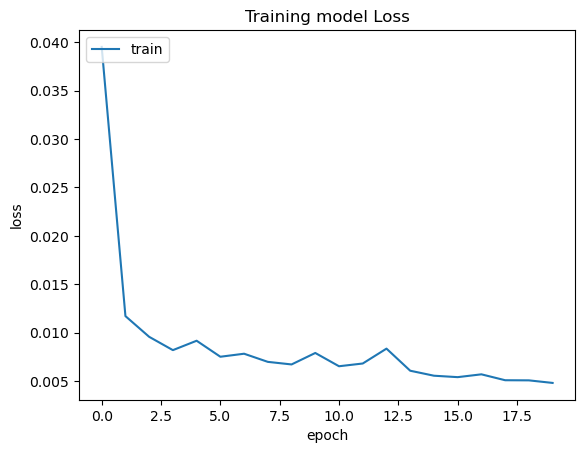

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
testData = pd.read_csv('Google_test_data.csv')

#convert close column to numeric
testData['Close']=pd.to_numeric(testData.Close,errors='coerce')

#drop null values
testData = testData.dropna()

#select "close" values for testing (4: 5th column at , 0,1,2,3,4)(up till 5)
testData = testData.iloc[:,4:5]

#prepare target values by selecting closing price @61st row
y_test = testData.iloc[60:,0:].values

#input array for the model
inputClosing = testData.iloc[:,0:].values #take closing prices from test data
inputClosing_scaled = sc.transform(inputClosing) #scale with same scaling parameters as training data
inputClosing_scaled.shape #check shape of resulting scaled array

#input sequence for model
x_test = []
length = len(testData)
timestep = 60


for i in range(timestep,length):
    x_test.append(inputClosing_scaled[i-timestep:i,0]) #sequence of 60 timesteps each iteration, append to test list
x_test = np.array(x_test) #convert to NP array
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1)) #3 dimensions for LSTM
x_test.shape #prepares x_test array 
#sequences of 60 consecutive days of closing price, formatted for input into LSTM

(192, 60, 1)

In [14]:
#predict model output
y_pred = model.predict(x_test)
y_pred

6/6 [==============================] - 2s 37ms/step


array([[1.1846982],
       [1.1870328],
       [1.1974952],
       [1.2146724],
       [1.2317877],
       [1.2393935],
       [1.2349284],
       [1.2225256],
       [1.2109431],
       [1.2039956],
       [1.1948116],
       [1.1822882],
       [1.1700674],
       [1.1584053],
       [1.152454 ],
       [1.1529694],
       [1.1660086],
       [1.1908989],
       [1.2234991],
       [1.259693 ],
       [1.28352  ],
       [1.292519 ],
       [1.2832141],
       [1.2601525],
       [1.2327452],
       [1.2100598],
       [1.1957393],
       [1.186282 ],
       [1.1747544],
       [1.161798 ],
       [1.1485219],
       [1.1343758],
       [1.115381 ],
       [1.0920022],
       [1.0782185],
       [1.0804198],
       [1.0962712],
       [1.1197915],
       [1.1465988],
       [1.1671382],
       [1.1869612],
       [1.2075948],
       [1.2292169],
       [1.2494136],
       [1.2647732],
       [1.271117 ],
       [1.2658844],
       [1.2571704],
       [1.2506409],
       [1.249842 ],


In [15]:
predicted_price = sc.inverse_transform(y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

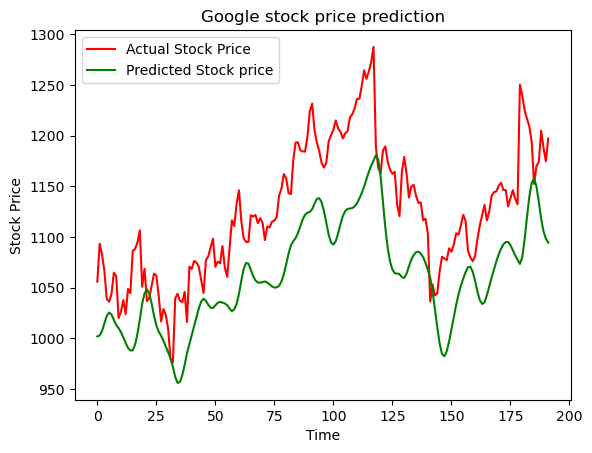

In [16]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show